In [157]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import csv
import pandas as pd
import json
import time
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import string 
import unicodedata as ud
from greek_stemmer import GreekStemmer
import pymongo
import numpy as np
import re
import networkx as nx
def create_db():    
    mongo_client = pymongo.MongoClient("mongodb://localhost:27017/")
    mongo_client.drop_database("GreekParliamentProceedings")
    inverted_index = mongo_client["GreekParliamentProceedings"]
    collection = inverted_index["InvertedIndex"]
    documents = mongo_client["GreekParliamentProceedings"]
    doc_collection = documents["Database"]
    return collection
def tokenize(row):
    return word_tokenize(row)

def preprocess_doc(doc: str) -> list:
    stemmer = GreekStemmer()
    d = {ord('\N{COMBINING ACUTE ACCENT}'):None}
    # load stopwords
    with open('stopwords.txt', encoding='utf-8') as file:
        stopwords = [line.rstrip() for line in file]
    #doc = doc.lower()
    if doc!="":
        words = [stemmer.stem(ud.normalize('NFD',w).upper().translate(d)).lower() for w in filter(None, re.split("[,~`; _'.\-!?:]+",doc)) if w not in stopwords and w not in string.punctuation]
    return words

def create_index(dataframe):
    collection=create_db()
    chunk = []
    counter = 0
    start_time = time.time()
    graphs=[]
    for data in dataframe:
        tokens = {}
        chunk = (data["speech"].values.tolist())
        print("Length of chunk: ", len(chunk))
        collection.insert_many(data.to_dict('records'))
        #chunk = ["This is a sentance","This is another one"]
        for i, row in enumerate(chunk):
            words_in_row = preprocess_doc(row.lower())
            g = nx.DiGraph()
            if(i==2):
                print(words_in_row)
            for j,word in enumerate(words_in_row):

                if word not in g.nodes:
                    g.add_node(word)    
                gen = (x for x in range(j+1,j+4) if x<len(words_in_row))
                #print(list(gen))
                for k in gen:
                    if(word == words_in_row[k]):
                        pass
                    elif((word, words_in_row[k]) not in g.edges):
                        g.add_edge(word, words_in_row[k])
                        g[word][words_in_row[k]]['weight'] = 1
                    else:
                        g[word][words_in_row[k]]['weight'] += 1
                    #term not in index
                
            graphs.append(g)
        counter +=1
        print("CHUNK", counter, " FINISHED")
        print("Number of Tokens: ", len(tokens))
        
        print(type(tokens))
        if(counter == 1):
            break
    
    
    return graphs

In [158]:
dataframe = pd.read_csv('Greek_Parliament_Proceedings_1989_2020.csv', chunksize=1000)
graphs = create_index(dataframe)

Length of chunk:  1000


c:\ProgramData\Anaconda3\lib\site-packages\greek_stemmer\__init__.py:340: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  custom_rules = yaml.load(f.read())


['κυρι', 'συναδελφ', 'παρακαλ', 'βουλ', 'εξουσιοδοτ', 'προεδρει', 'για', 'επικυρως', 'πρακτ', 'σημεριν', 'συνεδρ']
CHUNK 1  FINISHED
Number of Tokens:  0
<class 'dict'>


In [159]:
print(len(graphs))

1000


<Figure size 432x288 with 0 Axes>

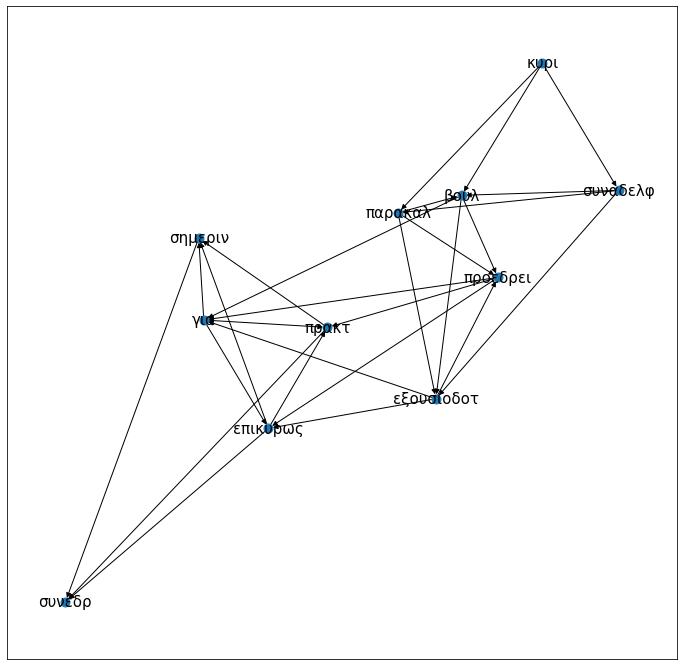

In [160]:
#print(graphs[0].edges)
import matplotlib.pyplot as plt
 
plt.savefig('graph.png')
# larger figure size
#pos = nx.circular_layout(graphs[2])

plt.figure(3,figsize=(12,12)) 
nx.draw_networkx(graphs[2], with_labels=True,node_size=80,font_size=15)
plt.show()

In [167]:
print(len(graphs[456].nodes))
#567

378


In [168]:
res = nx.k_core(graphs[456])
print(len(res.nodes))
print((res.nodes))

23
['τις', 'οτι', 'ειναι', 'σ', 'νε', 'οχι', 'εργαζομεν', 'απο', 'θα', 'εργατ', 'πολιτ', 'ειπ', 'αλλ', 'αυτ', 'για', 'ταξ', 'αριστερ', 'συναδελφ', 'αυτην', 'μια', 'καποι', 'δεν', 'πασοκ']


## Networkx library test

In [16]:
#networkx library
import networkx as nx
g = nx.Graph()
l = ['1','2','3']
#g.add_nodes_from(l)

for word in l:
    if(word not in list(g.nodes)):
        g.add_node(word)
for e in list(g.nodes):
    print(e)
    
g.add_edge('1','2')
g.add_edge('2','3')
if(('1','2') in g.edges):
    print(' in')
for e in list(g.edges):
    print(e)

1
2
3
 in
('1', '2')
('2', '3')
